# TLDR

As of 5/29/2023, this notebook tests the new changes in our model class regarding the viral load progression with plateau. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [4]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

# Test model with low prevalence

(As explored in test_deterministic_simulation.ipynb), set max_dt = 1, ie., when tau exceeds max_dt, the model increments by max_dt in time but does not run any transition

In [5]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [6]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
    verbose=0 # 1 for slightly verbose, 2 for very verbose
)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 0.01
)

sim_correlated.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.86it/s]


Screening day:  0  self.model.t:  0.01
Running screening for group 1 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.37it/s]


Screening day:  1  self.model.t:  1.0000000000000007
{'t': 1.2100149418755937, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'EtoIPRE'}
{'t': 1.2100149418995263, 'transitionNode': 547, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.2100149420095005, 'transitionNode': 546, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.210014942401116, 'transitionNode': 925, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.2100149426834406, 'transitionNode': 927, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.210014944030336, 'transitionNode': 545, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 2 on day 2...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.97it/s]


Screening day:  2  self.model.t:  2.0000149440303367
Running screening for group 3 on day 3...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 31.92it/s]


Screening day:  3  self.model.t:  3.0000149440303154
{'t': 3.0000166618689037, 'transitionNode': 546, 'transitionNodeVL': 9.228063786737303, 'transitionType': 'EtoIPRE'}
{'t': 3.070025053879212, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'EtoIPRE'}
{'t': 3.3300281463592487, 'transitionNode': 927, 'transitionNodeVL': 7.646254618592979, 'transitionType': 'EtoIPRE'}
{'t': 3.350047889141104, 'transitionNode': 545, 'transitionNodeVL': 8.534676672440877, 'transitionType': 'EtoIPRE'}
{'t': 3.8400495983236125, 'transitionNode': 547, 'transitionNodeVL': 9.232792547847191, 'transitionType': 'EtoIPRE'}
Running screening for group 4 on day 4...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 33.72it/s]


Screening day:  4  self.model.t:  4.000049598323609
{'t': 4.900050522100937, 'transitionNode': 926, 'transitionNodeVL': 6.536954177653182, 'transitionType': 'QPREtoQSYM'}
Running screening for group 5 on day 5...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.53it/s]


Screening day:  5  self.model.t:  5.000050522100935
{'t': 5.330055474012143, 'transitionNode': 546, 'transitionNodeVL': 9.216841758357582, 'transitionType': 'IPREtoISYM'}
{'t': 5.6800578935951425, 'transitionNode': 545, 'transitionNodeVL': 8.530547544644632, 'transitionType': 'IPREtoISYM'}
{'t': 5.790065735960132, 'transitionNode': 547, 'transitionNodeVL': 9.221871364453525, 'transitionType': 'IPREtoISYM'}
Running screening for group 6 on day 6...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.94it/s]


Screening day:  6  self.model.t:  6.000065735960128
{'t': 6.450094267991755, 'transitionNode': 927, 'transitionNodeVL': 7.643412918299935, 'transitionType': 'IPREtoISYM'}
{'t': 6.720116006822456, 'transitionNode': 925, 'transitionNodeVL': 9.718396173166497, 'transitionType': 'IPREtoISYM'}
Running screening for group 7 on day 7...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.19it/s]


Screening day:  7  self.model.t:  7.00011600682245
Running screening for group 8 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.35it/s]


Screening day:  8  self.model.t:  8.000116006822429
Running screening for group 9 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.42it/s]


Screening day:  9  self.model.t:  9.000116006822408
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.92it/s]


Screening day:  10  self.model.t:  10.000116006822386
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.66it/s]


Screening day:  11  self.model.t:  11.000116006822365
{'t': 11.010127019369211, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 2 on day 12...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.47it/s]


Screening day:  12  self.model.t:  12.00012701936919
Running screening for group 3 on day 13...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.40it/s]


Screening day:  13  self.model.t:  13.000127019369168
Running screening for group 4 on day 14...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.25it/s]


Screening day:  14  self.model.t:  14.000127019369147
Running screening for group 5 on day 15...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.73it/s]


Screening day:  15  self.model.t:  15.000127019369126
Running screening for group 6 on day 16...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.55it/s]


Screening day:  16  self.model.t:  16.000127019369106
{'t': 16.44013252878851, 'transitionNode': 545, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.85015862112506, 'transitionNode': 547, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 7 on day 17...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.92it/s]


Screening day:  17  self.model.t:  17.000158621125085
{'t': 17.550170170921472, 'transitionNode': 925, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 17.57017937259963, 'transitionNode': 546, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 8 on day 18...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.88it/s]


Screening day:  18  self.model.t:  18.000179372599696
{'t': 18.050179857873683, 'transitionNode': 927, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 9 on day 19...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.01it/s]


Screening day:  19  self.model.t:  19.00017985787383
Running screening for group 0 on day 20...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.93it/s]


Screening day:  20  self.model.t:  20.000179857873988
Running screening for group 1 on day 21...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.97it/s]


Screening day:  21  self.model.t:  21.000179857874144
Running screening for group 2 on day 22...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.83it/s]


Screening day:  22  self.model.t:  22.0001798578743
Running screening for group 3 on day 23...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.16it/s]


Screening day:  23  self.model.t:  23.000179857874457
Running screening for group 4 on day 24...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.65it/s]


Screening day:  24  self.model.t:  24.000179857874613
Running screening for group 5 on day 25...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.26it/s]


Screening day:  25  self.model.t:  25.00017985787477
Running screening for group 6 on day 26...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.62it/s]


Screening day:  26  self.model.t:  26.000179857874926
Running screening for group 7 on day 27...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.85it/s]


Screening day:  27  self.model.t:  27.000179857875082


Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

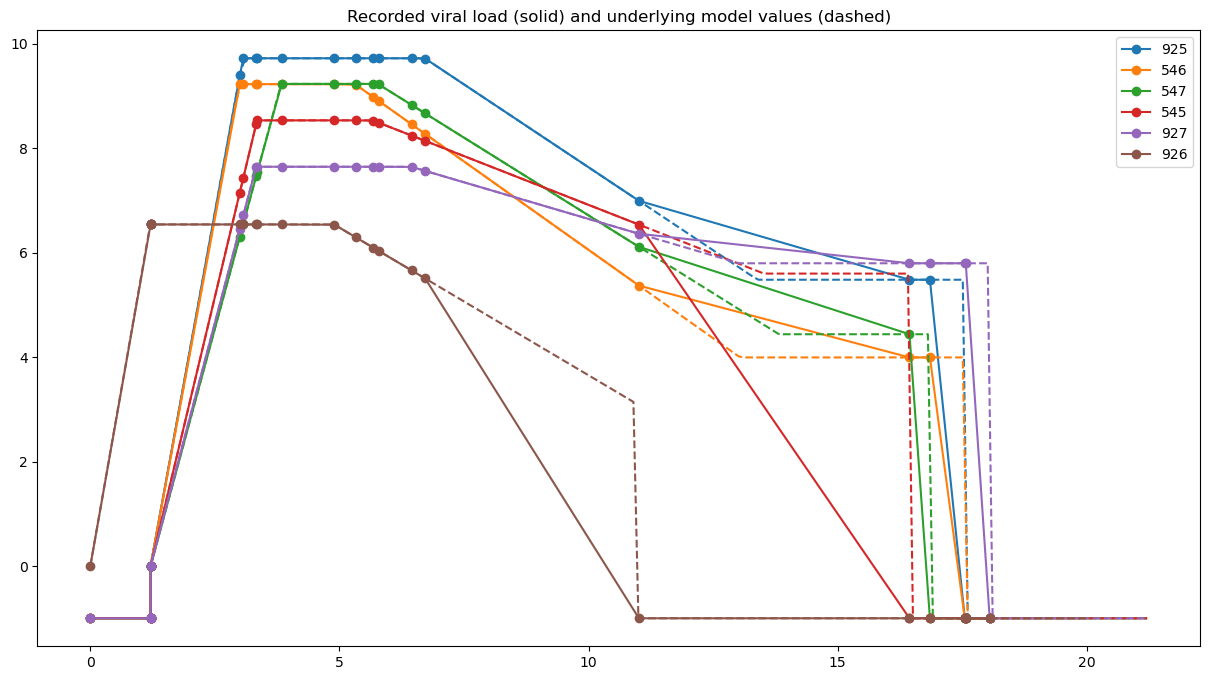

In [7]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in [925, 546, 547, 545, 927, 926]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated.model.VL_over_time["time_points"],
        sim_correlated.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated.model.infection_start_times[i], 
        sim_correlated.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

In [12]:
sim_correlated.model.VL_over_time["VL_time_series"][925]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.4817854791035168e-09,
 1.4817854791035168e-09,
 8.550989199197142e-09,
 8.550989199197142e-09,
 9.394854288427858,
 9.394854288427858,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.723595966502245,
 9.718396173166497,
 9.718396173166497,
 6.994228855393926,
 6.994228855393926,
 5.482904977758375,
 5.482904977758375,
 5.482904977758375,
 5.482904977758375,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

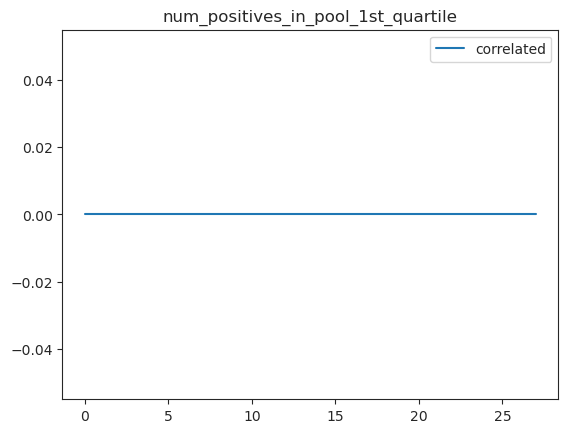

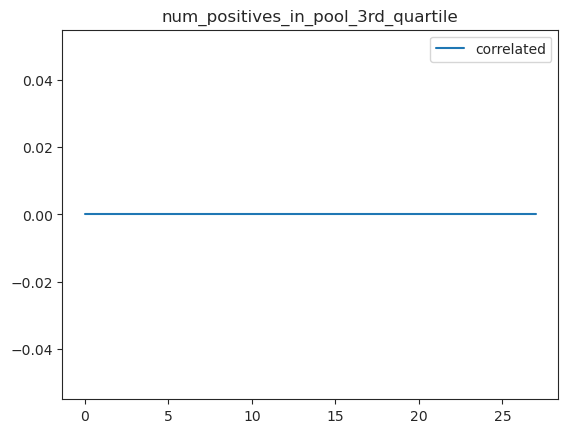

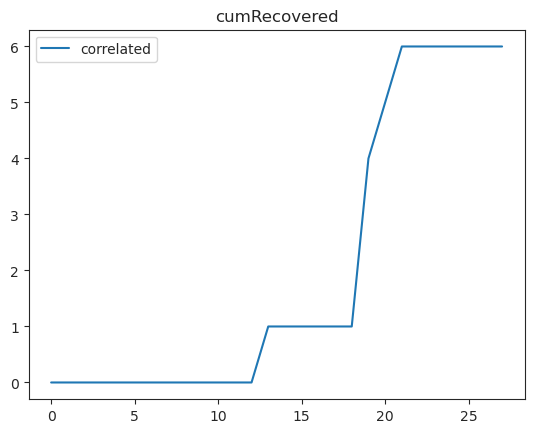

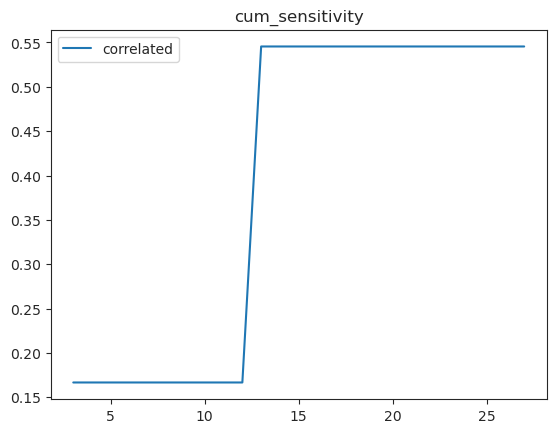

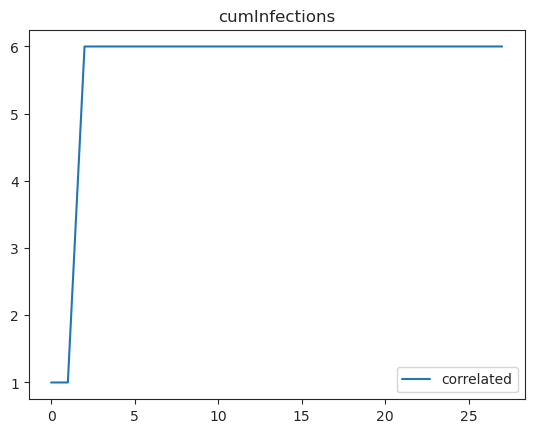

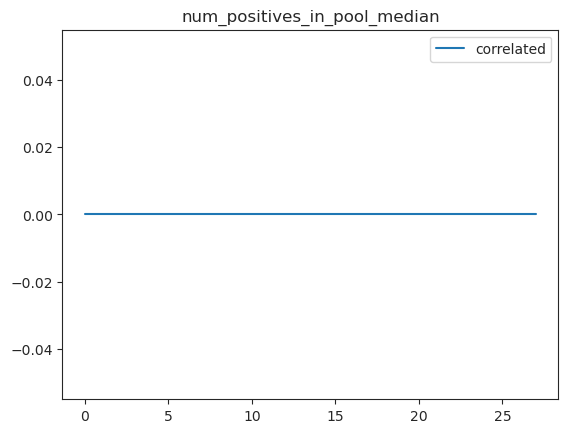

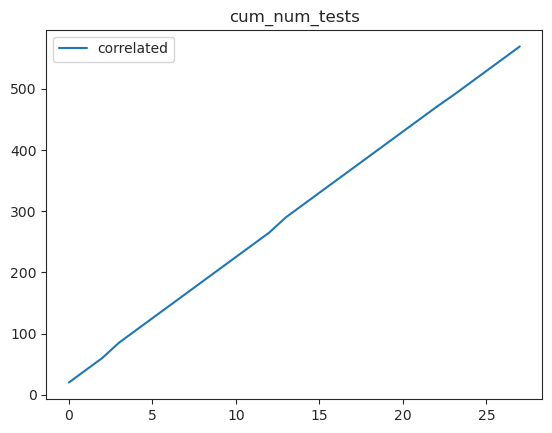

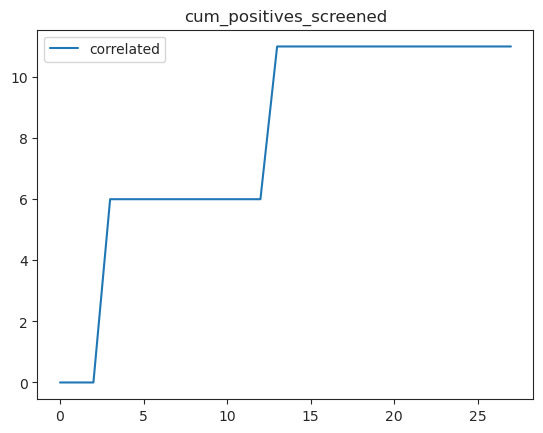

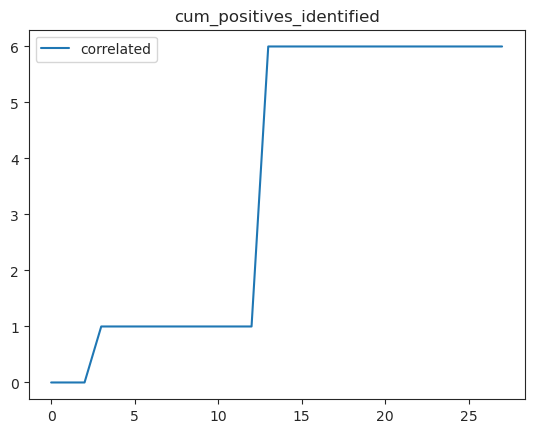

In [23]:
metrics = sim_correlated.overall_results[0].keys()
metrics = set(metrics) - {"day"}

for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()

In [24]:
sim_correlated.model.symptomatic_by_node[546]

array([ True])

In [25]:
sim_correlated.model.VL_params_by_node[546]

{'critical_time_points': [1.7803994237828509,
  4.103467151618752,
  11.83182284159208,
  16.339355405664087],
 'peak_plateau_height': 9.228063786737303,
 'tail_height': 3.995104373957224}

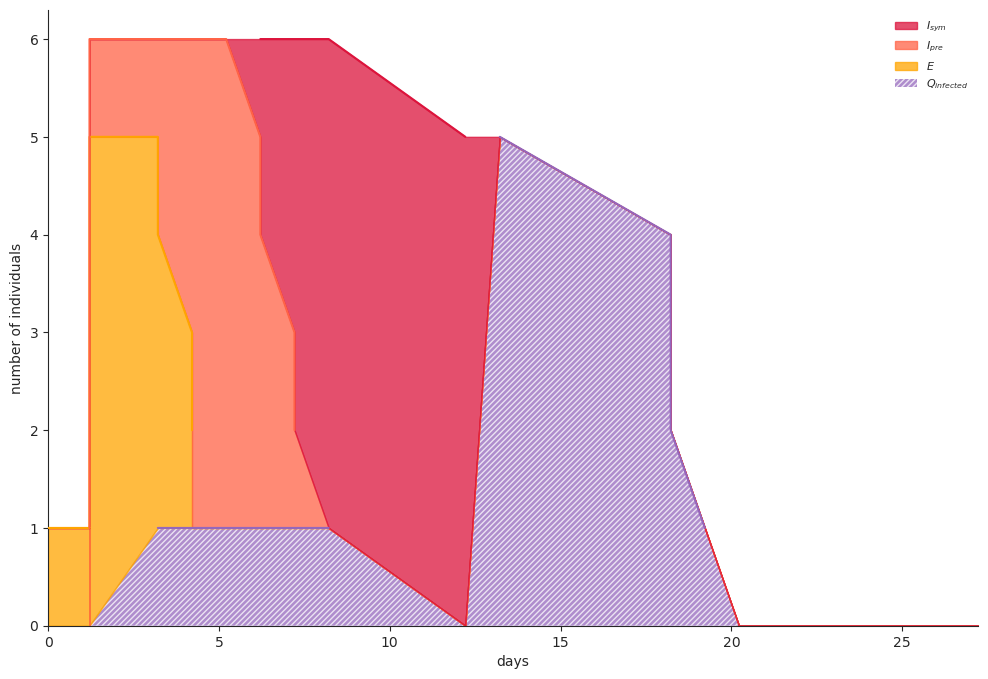

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [26]:
sim_correlated.model.figure_infections(plot_percentages=False)

# Try a higher initial prevalence

In [5]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.01)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [6]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model_2 = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
    verbose=0
)

sim_correlated_2 = SimulationRunner(
    model=test_model_2,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 0.01
)

sim_correlated_2.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.04it/s]


num_positives_per_pool:  []
Screening day:  0  self.model.t:  0.01
Running screening for group 1 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.17it/s]


num_positives_per_pool:  []
Screening day:  1  self.model.t:  1.0000000000000007
{'t': 1.0100124695346435, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transitionType': 'EtoIPRE'}
{'t': 1.0100124695491903, 'transitionNode': 984, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0100124696116393, 'transitionNode': 738, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0100124702818345, 'transitionNode': 739, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.1500340531921835, 'transitionNode': 314, 'transitionNodeVL': 6.001567429012347, 'transitionType': 'EtoIPRE'}
{'t': 1.1500340541149734, 'transitionNode': 313, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.1500340545134233, 'transitionNode': 813, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.1500340545612888, 'transitionNode': 814, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.1500340549132066, 'transitionNode': 312, 'transitionNodeVL': 0.0, 'transitionT

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.44it/s]


num_positives_per_pool:  [1]
Screening day:  2  self.model.t:  2.0000563666458615
{'t': 2.111428835704226, 'transitionNode': 670, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.481452189619803, 'transitionNode': 857, 'transitionNodeVL': 5.1142602971108735, 'transitionType': 'EtoIPRE'}
{'t': 2.481452189632713, 'transitionNode': 858, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.4814521898586137, 'transitionNode': 856, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.4814521899557724, 'transitionNode': 408, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.4814521906194327, 'transitionNode': 409, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.521455789649975, 'transitionNode': 807, 'transitionNodeVL': 9.79781839449879, 'transitionType': 'EtoIPRE'}
{'t': 2.52145578966405, 'transitionNode': 298, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.521455790267504, 'transitionNode': 301, 'transitionNodeVL': 0.0, 'transitionType':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.62it/s]


num_positives_per_pool:  [5, 1, 1, 5, 1]
Screening day:  3  self.model.t:  3.00032360731731
{'t': 3.000385341966676, 'transitionNode': 546, 'transitionNodeVL': 9.228063786737303, 'transitionType': 'QEtoQPRE'}
{'t': 3.0703878590468925, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'QEtoQPRE'}
{'t': 3.3103881478658588, 'transitionNode': 814, 'transitionNodeVL': 9.177351175043656, 'transitionType': 'QEtoQPRE'}
{'t': 3.31812339549311, 'transitionNode': 476, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 3.3281320227619626, 'transitionNode': 927, 'transitionNodeVL': 7.646254618592979, 'transitionType': 'QEtoQPRE'}
{'t': 3.348141306469943, 'transitionNode': 545, 'transitionNodeVL': 8.534676672440877, 'transitionType': 'QEtoQPRE'}
{'t': 3.3881586561311936, 'transitionNode': 312, 'transitionNodeVL': 8.221222914838865, 'transitionType': 'QEtoQPRE'}
{'t': 3.4681917276127106, 'transitionNode': 782, 'transitionNodeVL': 7.901992054766001, 'transitionType'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.94it/s]


num_positives_per_pool:  [1, 1, 1, 1]
Screening day:  4  self.model.t:  4.001428326252559
{'t': 4.141430019312283, 'transitionNode': 813, 'transitionNodeVL': 8.646333368151328, 'transitionType': 'QEtoQPRE'}
{'t': 4.181440516266467, 'transitionNode': 858, 'transitionNodeVL': 9.590964305119163, 'transitionType': 'EtoIPRE'}
{'t': 4.3296163741150915, 'transitionNode': 250, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 4.391895789483961, 'transitionNode': 566, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 4.451903804256904, 'transitionNode': 202, 'transitionNodeVL': 6.5139747118005475, 'transitionType': 'IPREtoISYM'}
{'t': 4.609735799181907, 'transitionNode': 339, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 4.639749952320701, 'transitionNode': 753, 'transitionNodeVL': 8.131947160713374, 'transitionType': 'EtoIPRE'}
{'t': 4.669760408299885, 'transitionNode': 959, 'transitionNodeVL': 5.809159691215414, 'transitionType': 'QPREtoQSYM'}
{'t': 4.739784476224047,

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.25it/s]


num_positives_per_pool:  []
Screening day:  5  self.model.t:  5.009822321564849
{'t': 5.109841488613611, 'transitionNode': 807, 'transitionNodeVL': 9.790428210571774, 'transitionType': 'IPREtoISYM'}
{'t': 5.219842853993264, 'transitionNode': 856, 'transitionNodeVL': 5.188546320870816, 'transitionType': 'EtoIPRE'}
{'t': 5.329842917012578, 'transitionNode': 546, 'transitionNodeVL': 9.217004893875604, 'transitionType': 'QPREtoQSYM'}
{'t': 5.369844781804615, 'transitionNode': 408, 'transitionNodeVL': 5.9333161246618635, 'transitionType': 'EtoIPRE'}
{'t': 5.469854080096957, 'transitionNode': 754, 'transitionNodeVL': 5.0852658355741145, 'transitionType': 'IPREtoISYM'}
{'t': 5.499855527178556, 'transitionNode': 739, 'transitionNodeVL': 6.7222180540167145, 'transitionType': 'IPREtoISYM'}
{'t': 5.532860826510812, 'transitionNode': 794, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 5.582887570611125, 'transitionNode': 740, 'transitionNodeVL': 8.780964722701498, 'transitionType': 'IPRE

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.56it/s]


num_positives_per_pool:  [1, 1]
Screening day:  6  self.model.t:  6.00293393162321
{'t': 6.002949933663284, 'transitionNode': 782, 'transitionNodeVL': 7.894841799056541, 'transitionType': 'IPREtoISYM'}
{'t': 6.142965891759819, 'transitionNode': 813, 'transitionNodeVL': 8.638919616125772, 'transitionType': 'QPREtoQSYM'}
{'t': 6.172970314517733, 'transitionNode': 566, 'transitionNodeVL': 8.573197085879555, 'transitionType': 'EtoIPRE'}
{'t': 6.192990563278299, 'transitionNode': 313, 'transitionNodeVL': 5.924589063168105, 'transitionType': 'QPREtoQSYM'}
{'t': 6.222999681591193, 'transitionNode': 339, 'transitionNodeVL': 8.588597980726412, 'transitionType': 'EtoIPRE'}
{'t': 6.2730052593332255, 'transitionNode': 514, 'transitionNodeVL': 9.470831521060171, 'transitionType': 'EtoIPRE'}
{'t': 6.343006774802921, 'transitionNode': 738, 'transitionNodeVL': 8.608102882405351, 'transitionType': 'IPREtoISYM'}
{'t': 6.443017675280792, 'transitionNode': 927, 'transitionNodeVL': 7.64540753171095, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.41it/s]


num_positives_per_pool:  [1, 1, 3]
Screening day:  7  self.model.t:  7.003037086124374
{'t': 7.023040172409419, 'transitionNode': 814, 'transitionNodeVL': 9.169845886103133, 'transitionType': 'QPREtoQSYM'}
{'t': 7.023046410238978, 'transitionNode': 301, 'transitionNodeVL': 9.79130581976241, 'transitionType': 'IPREtoISYM'}
{'t': 7.073054399927947, 'transitionNode': 409, 'transitionNodeVL': 7.977815479016137, 'transitionType': 'IPREtoISYM'}
{'t': 7.123063597150041, 'transitionNode': 856, 'transitionNodeVL': 5.186687465508071, 'transitionType': 'IPREtoISYM'}
{'t': 7.133069699698105, 'transitionNode': 312, 'transitionNodeVL': 8.213688291587628, 'transitionType': 'QPREtoQSYM'}
{'t': 7.143072303965057, 'transitionNode': 299, 'transitionNodeVL': 8.330290541963404, 'transitionType': 'IPREtoISYM'}
{'t': 7.293081609780645, 'transitionNode': 958, 'transitionNodeVL': 8.366185864477718, 'transitionType': 'IPREtoISYM'}
{'t': 7.29835899365794, 'transitionNode': 331, 'transitionNodeVL': 0.0, 'transiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.39it/s]


num_positives_per_pool:  [4, 5]
Screening day:  8  self.model.t:  8.007764321642986
{'t': 8.04776813882693, 'transitionNode': 255, 'transitionNodeVL': 5.336020193909865, 'transitionType': 'QPREtoQSYM'}
{'t': 8.257776768085401, 'transitionNode': 408, 'transitionNodeVL': 5.930023507100423, 'transitionType': 'QPREtoQSYM'}
{'t': 8.287780815008427, 'transitionNode': 839, 'transitionNodeVL': 8.178532794646488, 'transitionType': 'IPREtoISYM'}
{'t': 8.317805187709062, 'transitionNode': 300, 'transitionNodeVL': 9.634540215736482, 'transitionType': 'IPREtoISYM'}
{'t': 8.328970925266646, 'transitionNode': 515, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 8.34897662679542, 'transitionNode': 201, 'transitionNodeVL': 9.736599563915318, 'transitionType': 'QPREtoQSYM'}
{'t': 8.418976922569323, 'transitionNode': 794, 'transitionNodeVL': 7.628069662222274, 'transitionType': 'EtoIPRE'}
{'t': 8.438987642813913, 'transitionNode': 576, 'transitionNodeVL': 5.728703503623438, 'transitionType': 'QP

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.02it/s]


num_positives_per_pool:  [5]
Screening day:  9  self.model.t:  9.005175513254715
{'t': 9.375179544270221, 'transitionNode': 331, 'transitionNodeVL': 9.610707848614094, 'transitionType': 'EtoIPRE'}
{'t': 9.415195630230846, 'transitionNode': 515, 'transitionNodeVL': 8.366126638500072, 'transitionType': 'EtoIPRE'}
{'t': 9.54765020056852, 'transitionNode': 435, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 9.742029719222387, 'transitionNode': 882, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 9.94203950066959, 'transitionNode': 419, 'transitionNodeVL': 7.61415804466666, 'transitionType': 'EtoIPRE'}
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.98it/s]


num_positives_per_pool:  []
Screening day:  10  self.model.t:  10.00203950066959
{'t': 10.200634926817692, 'transitionNode': 464, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.480639977822202, 'transitionNode': 339, 'transitionNodeVL': 8.58618274185715, 'transitionType': 'IPREtoISYM'}
{'t': 10.67798410529725, 'transitionNode': 351, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.707988307428243, 'transitionNode': 343, 'transitionNodeVL': 8.141577053231348, 'transitionType': 'EtoIPRE'}
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.10it/s]


num_positives_per_pool:  []
Screening day:  11  self.model.t:  11.007988307428237
{'t': 11.007993326100266, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.008001079803568, 'transitionNode': 959, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.018002081177297, 'transitionNode': 857, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.018002446365594, 'transitionNode': 840, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.018002533229438, 'transitionNode': 202, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.018003045913197, 'transitionNode': 754, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.018005138566954, 'transitionNode': 314, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.098012642282063, 'transitionNode': 466, 'transitionNodeVL': 7.862140938321919, 'transitionType': 'EtoIPRE'}
{'t': 11.218018336970635, 'transitionNode': 794, 'transitionNodeVL

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.79it/s]


num_positives_per_pool:  [1]
Screening day:  12  self.model.t:  12.002811865958506
{'t': 12.022819283464049, 'transitionNode': 739, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 12.082843897808116, 'transitionNode': 351, 'transitionNodeVL': 6.062472233985353, 'transitionType': 'EtoIPRE'}
{'t': 12.172846235312704, 'transitionNode': 313, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 12.172869121752468, 'transitionNode': 331, 'transitionNodeVL': 9.603345838404831, 'transitionType': 'IPREtoISYM'}
{'t': 12.38288107218078, 'transitionNode': 419, 'transitionNodeVL': 7.611938592324641, 'transitionType': 'IPREtoISYM'}
{'t': 12.59740338142501, 'transitionNode': 305, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.727424109123824, 'transitionNode': 882, 'transitionNodeVL': 8.155289410603151, 'transitionType': 'EtoIPRE'}
{'t': 12.747438328812542, 'transitionNode': 466, 'transitionNodeVL': 7.854345451557723, 'transitionType': 'IPREtoISYM'}
{'t': 12.817447

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.62it/s]


num_positives_per_pool:  [1]
Screening day:  13  self.model.t:  13.00075038050127
{'t': 13.180761961821798, 'transitionNode': 812, 'transitionNodeVL': 6.808364888580147, 'transitionType': 'EtoIPRE'}
{'t': 13.490767913975871, 'transitionNode': 408, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 13.490794037771167, 'transitionNode': 856, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 13.580810294235851, 'transitionNode': 576, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 13.610813194790849, 'transitionNode': 343, 'transitionNodeVL': 8.138485752894438, 'transitionType': 'IPREtoISYM'}
{'t': 13.620817220651938, 'transitionNode': 267, 'transitionNodeVL': 6.423196334449864, 'transitionType': 'EtoIPRE'}
Running screening for group 4 on day 14...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.38it/s]


num_positives_per_pool:  [1, 1, 1, 3, 2, 2, 3, 1, 3, 1, 1]
Screening day:  14  self.model.t:  14.00081722065193
{'t': 14.060823212940482, 'transitionNode': 363, 'transitionNodeVL': 9.386644508968395, 'transitionType': 'QEtoQPRE'}
{'t': 14.120832166445611, 'transitionNode': 492, 'transitionNodeVL': 8.77445624582257, 'transitionType': 'EtoIPRE'}
{'t': 14.225908278199658, 'transitionNode': 389, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 14.225929345928218, 'transitionNode': 515, 'transitionNodeVL': 8.362441460525803, 'transitionType': 'QPREtoQSYM'}
{'t': 14.33593407144951, 'transitionNode': 476, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 14.485959064347025, 'transitionNode': 255, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 14.559692582703638, 'transitionNode': 491, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 14.709719181629115, 'transitionNode': 464, 'transitionNodeVL': 9.957428436162681, 'transitionType': 'QPREtoQSYM'}
{'t':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.81it/s]


num_positives_per_pool:  []
Screening day:  15  self.model.t:  15.005111555199166
{'t': 15.097207911164343, 'transitionNode': 433, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 15.137224244468468, 'transitionNode': 882, 'transitionNodeVL': 8.15302384564955, 'transitionType': 'QPREtoQSYM'}
{'t': 15.273386904764676, 'transitionNode': 286, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 15.343393096261815, 'transitionNode': 250, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 15.463398404084922, 'transitionNode': 807, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 15.75339946903004, 'transitionNode': 491, 'transitionNodeVL': 9.507173469568095, 'transitionType': 'EtoIPRE'}
{'t': 15.763410603073426, 'transitionNode': 351, 'transitionNodeVL': 6.0576563209585625, 'transitionType': 'QPREtoQSYM'}
{'t': 15.913411980443337, 'transitionNode': 338, 'transitionNodeVL': 8.646363197837772, 'transitionType': 'EtoIPRE'}
Running screening for group 6 on da

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.51it/s]


num_positives_per_pool:  []
Screening day:  16  self.model.t:  16.003411980443335
{'t': 16.333412209629074, 'transitionNode': 812, 'transitionNodeVL': 6.801960840704256, 'transitionType': 'QPREtoQSYM'}
{'t': 16.42341800428389, 'transitionNode': 254, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.433439847071, 'transitionNode': 545, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.48412655609058, 'transitionNode': 776, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 16.586385558107164, 'transitionNode': 520, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 16.62639184085627, 'transitionNode': 814, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.74639327893821, 'transitionNode': 433, 'transitionNodeVL': 8.657720622989181, 'transitionType': 'EtoIPRE'}
{'t': 16.746393370310713, 'transitionNode': 738, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.74639946750917, 'transitionNode': 389, 'transitionNodeVL': 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.10it/s]


num_positives_per_pool:  [1, 1]
Screening day:  17  self.model.t:  17.006484477456564
{'t': 17.216501332518952, 'transitionNode': 363, 'transitionNodeVL': 9.383030091687699, 'transitionType': 'QPREtoQSYM'}
{'t': 17.251295477813734, 'transitionNode': 522, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 17.277871385915358, 'transitionNode': 411, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 17.2978719196907, 'transitionNode': 813, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 17.297872640970777, 'transitionNode': 267, 'transitionNodeVL': 6.416444888919469, 'transitionType': 'QPREtoQSYM'}
{'t': 17.38787959512397, 'transitionNode': 984, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 17.397879728990066, 'transitionNode': 286, 'transitionNodeVL': 6.523188294945307, 'transitionType': 'QEtoQPRE'}
{'t': 17.4678845390966, 'transitionNode': 312, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 17.54789693166307, 'transitionNode': 925, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.01it/s]


num_positives_per_pool:  [1]
Screening day:  18  self.model.t:  18.007940288294538
{'t': 18.027956169137546, 'transitionNode': 776, 'transitionNodeVL': 9.237812126369853, 'transitionType': 'EtoIPRE'}
{'t': 18.047963945266435, 'transitionNode': 927, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 18.49797466305709, 'transitionNode': 389, 'transitionNodeVL': 7.950122136829508, 'transitionType': 'IPREtoISYM'}
{'t': 18.5180179733189, 'transitionNode': 670, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 18.637371975485838, 'transitionNode': 668, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 18.687373254991158, 'transitionNode': 301, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.697374310569256, 'transitionNode': 411, 'transitionNodeVL': 5.428081159340188, 'transitionType': 'EtoIPRE'}
{'t': 18.717385405649214, 'transitionNode': 839, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.787388889860903, 'transitionNode': 299,

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.87it/s]


num_positives_per_pool:  []
Screening day:  19  self.model.t:  19.00173916829171
{'t': 19.02174162599753, 'transitionNode': 201, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.126135208695157, 'transitionNode': 475, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 19.34613596790031, 'transitionNode': 522, 'transitionNodeVL': 9.51583769427192, 'transitionType': 'EtoIPRE'}
{'t': 19.356136013448708, 'transitionNode': 753, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.486137211502037, 'transitionNode': 409, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.506150677023456, 'transitionNode': 286, 'transitionNodeVL': 6.51912678899687, 'transitionType': 'QPREtoQSYM'}
{'t': 19.526156729710607, 'transitionNode': 514, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.566159840307378, 'transitionNode': 436, 'transitionNodeVL': 9.016260224177064, 'transitionType': 'IPREtoISYM'}
{'t': 19.596170700464416, 'transitionNode': 95

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.33it/s]


num_positives_per_pool:  []
Screening day:  20  self.model.t:  20.00617070046448
{'t': 20.0861858564508, 'transitionNode': 245, 'transitionNodeVL': 6.533777358332487, 'transitionType': 'EtoIPRE'}
{'t': 20.186188056221503, 'transitionNode': 339, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.22620923429613, 'transitionNode': 475, 'transitionNodeVL': 8.261992226647102, 'transitionType': 'EtoIPRE'}
{'t': 20.306210029709803, 'transitionNode': 701, 'transitionNodeVL': 5.304358629255235, 'transitionType': 'EtoIPRE'}
{'t': 20.736212686279657, 'transitionNode': 338, 'transitionNodeVL': 8.641010003065226, 'transitionType': 'IPREtoISYM'}
{'t': 20.816220647319984, 'transitionNode': 794, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.87622092790946, 'transitionNode': 668, 'transitionNodeVL': 8.88465795366445, 'transitionType': 'EtoIPRE'}
{'t': 20.966234249415088, 'transitionNode': 520, 'transitionNodeVL': 9.760423343335823, 'transitionType': 'IPREtoISYM'}
Runnin

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.38it/s]


num_positives_per_pool:  []
Screening day:  21  self.model.t:  21.006234249415094
{'t': 21.023021290416864, 'transitionNode': 318, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 21.08303268084443, 'transitionNode': 433, 'transitionNodeVL': 8.652010722505201, 'transitionType': 'QPREtoQSYM'}
{'t': 21.2830414090496, 'transitionNode': 566, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.29304627596137, 'transitionNode': 411, 'transitionNodeVL': 5.427255767312692, 'transitionType': 'IPREtoISYM'}
{'t': 21.69306311866903, 'transitionNode': 351, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 2 on day 22...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.47it/s]


num_positives_per_pool:  [1]
Screening day:  22  self.model.t:  22.00306311866908
{'t': 22.09811150847387, 'transitionNode': 678, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 22.19484463940156, 'transitionNode': 344, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 22.384847914096312, 'transitionNode': 776, 'transitionNodeVL': 9.232968877130936, 'transitionType': 'IPREtoISYM'}
{'t': 22.454869210944388, 'transitionNode': 267, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 22.654870869634276, 'transitionNode': 668, 'transitionNodeVL': 8.881773309190255, 'transitionType': 'IPREtoISYM'}
{'t': 22.74487972269137, 'transitionNode': 812, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 3 on day 23...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.52it/s]


num_positives_per_pool:  []
Screening day:  23  self.model.t:  23.00487972269141
{'t': 23.0515012842504, 'transitionNode': 439, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 23.101507684658905, 'transitionNode': 522, 'transitionNodeVL': 9.512799644687421, 'transitionType': 'IPREtoISYM'}
{'t': 23.14929583247848, 'transitionNode': 587, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 23.16931069514579, 'transitionNode': 331, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 23.297626666112777, 'transitionNode': 696, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 23.477656142322132, 'transitionNode': 419, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 23.547659052395375, 'transitionNode': 344, 'transitionNodeVL': 6.070764854531369, 'transitionType': 'EtoIPRE'}
{'t': 23.54766775131198, 'transitionNode': 701, 'transitionNodeVL': 5.302058088730921, 'transitionType': 'IPREtoISYM'}
{'t': 23.547977888705017, 'transitionNode': 516, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 23.01it/s]


num_positives_per_pool:  [1, 2, 2, 2, 1, 1, 1, 4]
Screening day:  24  self.model.t:  24.008018180609035
{'t': 24.008023793083087, 'transitionNode': 318, 'transitionNodeVL': 8.877281572969327, 'transitionType': 'QEtoQPRE'}
{'t': 24.04730284056705, 'transitionNode': 723, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.172268818490437, 'transitionNode': 350, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.31227641198441, 'transitionNode': 515, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.4422771617658, 'transitionNode': 245, 'transitionNodeVL': 6.525395447957946, 'transitionType': 'QPREtoQSYM'}
{'t': 24.72228389360905, 'transitionNode': 343, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.752299233266392, 'transitionNode': 439, 'transitionNodeVL': 6.65368472888009, 'transitionType': 'QEtoQPRE'}
{'t': 24.79230179248684, 'transitionNode': 466, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.822315289851776, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.81it/s]


num_positives_per_pool:  [1]
Screening day:  25  self.model.t:  25.002338164465872
{'t': 25.35235027701569, 'transitionNode': 516, 'transitionNodeVL': 6.305104650070066, 'transitionType': 'EtoIPRE'}
{'t': 25.442350503465956, 'transitionNode': 318, 'transitionNodeVL': 8.874476220478341, 'transitionType': 'QPREtoQSYM'}
{'t': 25.592361767782236, 'transitionNode': 464, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 25.6123676926311, 'transitionNode': 350, 'transitionNodeVL': 8.07571265583556, 'transitionType': 'EtoIPRE'}
{'t': 25.672372189169867, 'transitionNode': 696, 'transitionNodeVL': 8.196764883742134, 'transitionType': 'EtoIPRE'}
{'t': 25.842385412598794, 'transitionNode': 435, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 6 on day 26...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.19it/s]


num_positives_per_pool:  []
Screening day:  26  self.model.t:  26.00238541259882
{'t': 26.052389998466392, 'transitionNode': 723, 'transitionNodeVL': 6.388772988491472, 'transitionType': 'EtoIPRE'}
{'t': 26.282390000450704, 'transitionNode': 286, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 26.722416045050565, 'transitionNode': 363, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 26.842422283689878, 'transitionNode': 678, 'transitionNodeVL': 7.919798690700602, 'transitionType': 'QPREtoQSYM'}
Running screening for group 7 on day 27...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.96it/s]


num_positives_per_pool:  [1, 1]
Screening day:  27  self.model.t:  27.002422283689903
{'t': 27.03830227803549, 'transitionNode': 609, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 27.15830484278897, 'transitionNode': 344, 'transitionNodeVL': 6.065992320774583, 'transitionType': 'QPREtoQSYM'}
{'t': 27.528321804165913, 'transitionNode': 696, 'transitionNodeVL': 8.193693300978795, 'transitionType': 'QPREtoQSYM'}
{'t': 27.878342271302916, 'transitionNode': 439, 'transitionNodeVL': 6.6482740201378565, 'transitionType': 'QPREtoQSYM'}
Running screening for group 8 on day 28...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.33it/s]


num_positives_per_pool:  [1]
Screening day:  28  self.model.t:  28.008342271302936
{'t': 28.065491102734082, 'transitionNode': 285, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 28.285493491348262, 'transitionNode': 411, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 28.382589617622177, 'transitionNode': 410, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 28.722594138732465, 'transitionNode': 587, 'transitionNodeVL': 6.897449814057999, 'transitionType': 'IPREtoISYM'}
{'t': 28.782595706268445, 'transitionNode': 609, 'transitionNodeVL': 6.604168565377489, 'transitionType': 'EtoIPRE'}
Running screening for group 9 on day 29...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.97it/s]


num_positives_per_pool:  []
Screening day:  29  self.model.t:  29.00259570626848
{'t': 29.052599561116125, 'transitionNode': 516, 'transitionNodeVL': 6.301854372349098, 'transitionType': 'IPREtoISYM'}
{'t': 29.413766233988895, 'transitionNode': 311, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 29.563768216371205, 'transitionNode': 492, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.813775220229257, 'transitionNode': 245, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.843788769627942, 'transitionNode': 723, 'transitionNodeVL': 6.382784782480246, 'transitionType': 'QPREtoQSYM'}
{'t': 29.953797407168093, 'transitionNode': 338, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.963808397433713, 'transitionNode': 701, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 0 on day 30...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.54it/s]


num_positives_per_pool:  []
Screening day:  30  self.model.t:  30.00380839743372
{'t': 30.023816577369494, 'transitionNode': 436, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}


In [10]:
infected_nodes = [log['infected_node'] for log in sim_correlated_2.model.infectionsLog]

Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

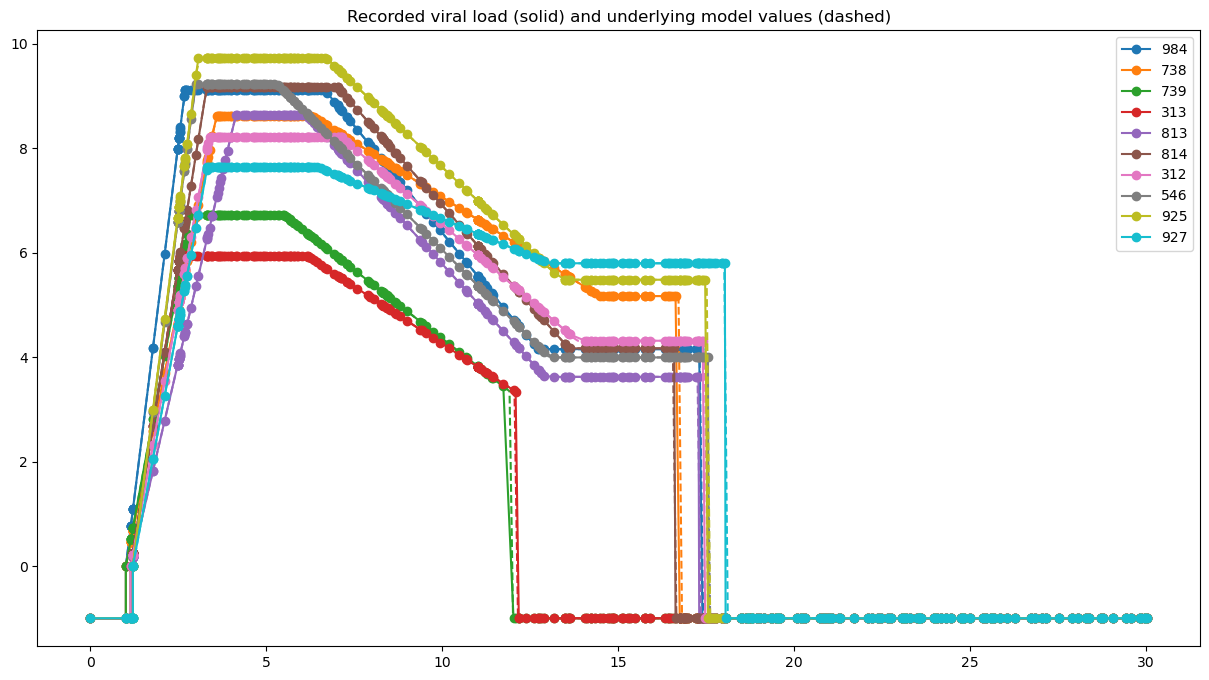

In [11]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in infected_nodes[:10]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated_2.model.VL_over_time["time_points"],
        sim_correlated_2.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated_2.model.infection_start_times[i], 
        sim_correlated_2.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated_2.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated_2.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated_2.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated_2.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

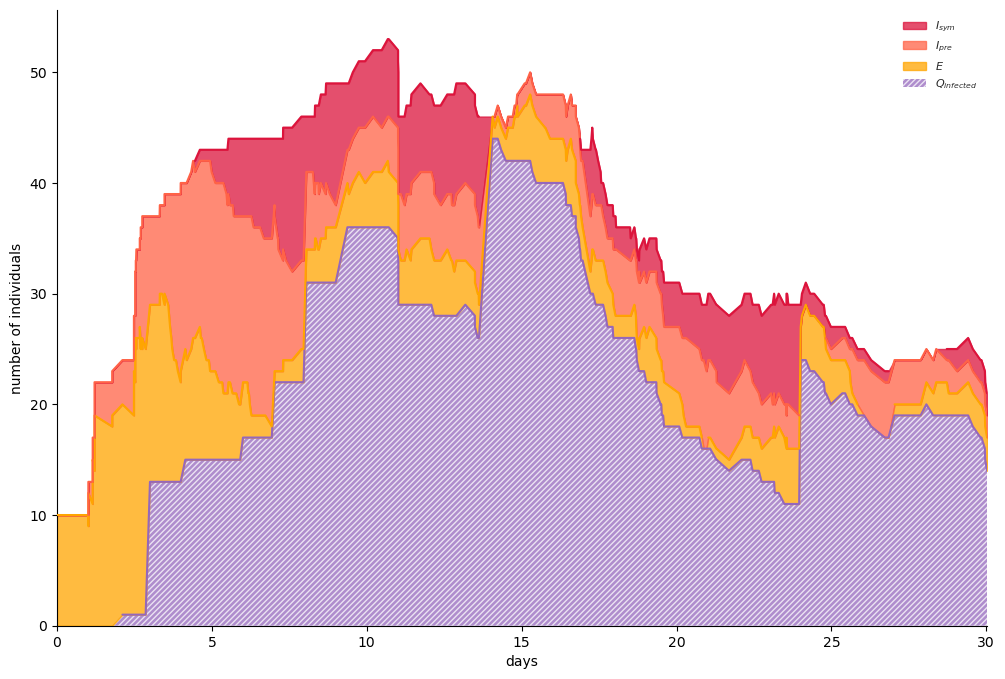

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [12]:
sim_correlated_2.model.figure_infections(plot_percentages=False)

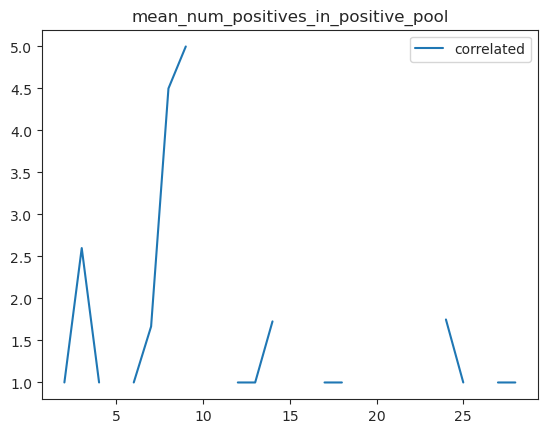

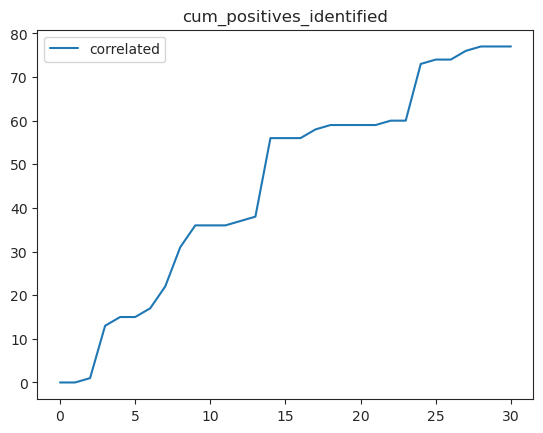

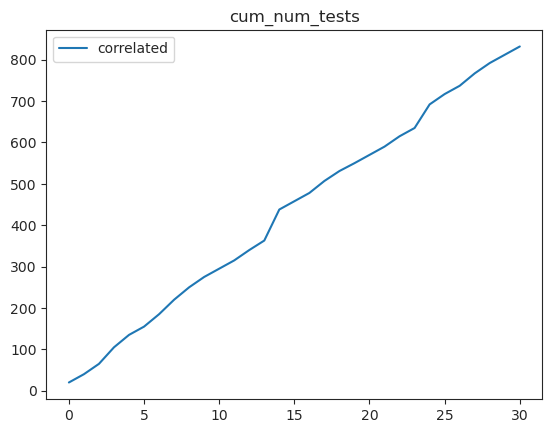

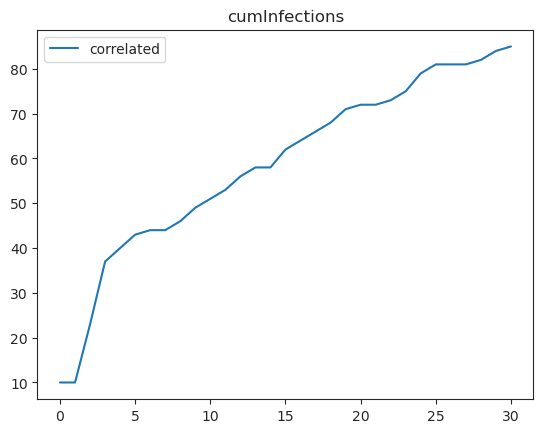

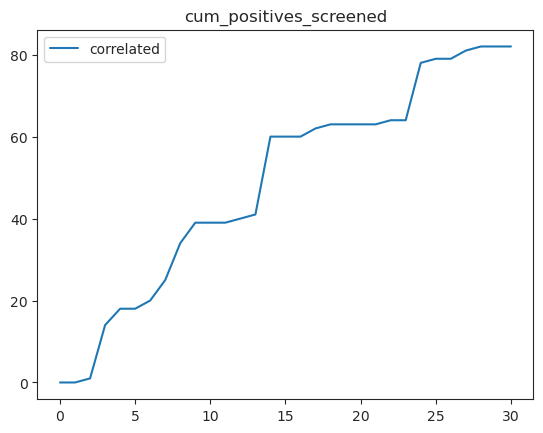

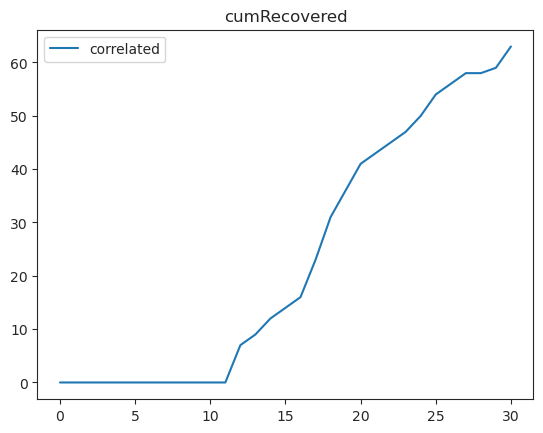

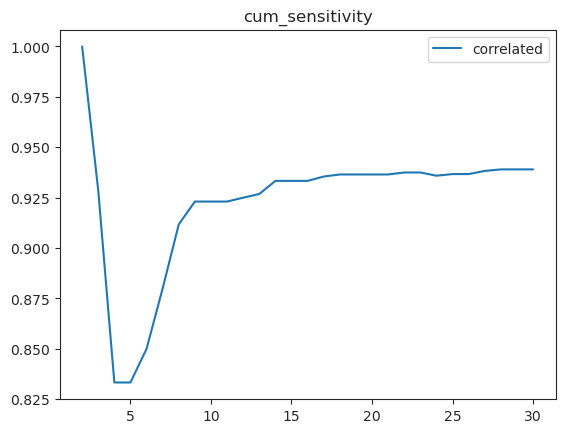

In [13]:
metrics = sim_correlated_2.overall_results[0].keys()
metrics = set(metrics) - {"day"}

for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated_2.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()

In [33]:
sim_correlated_2.model.VL_params_by_node[739]

{'critical_time_points': [1.8441633934601107, 4.478113793881777, 11.0, 11.0],
 'peak_plateau_height': 6.728393242306364,
 'tail_height': 3.294769554685667}

In [34]:
sim_correlated_2.model.symptomatic_by_node[739]

array([False])